In [309]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import scipy.stats
from scipy.stats import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


nRowsRead = None # specify 'None' if want to read whole file
# movie_metadata.csv has 5044 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('C:\\DataScience_Mahesh\\movie_metadata.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'movie_metadata.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5043 rows and 28 columns


%%html
<style type='text/css'>
.CodeMirror{
    font-size: 12px;
}

div.output_area pre {
    font-size: 12px;
}
</style>
Assignment 1

In [261]:
df1.isnull().any(axis = 1).sum()

1287

In [262]:
df1.columns[df1.isnull().any()]

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')

<AxesSubplot:>

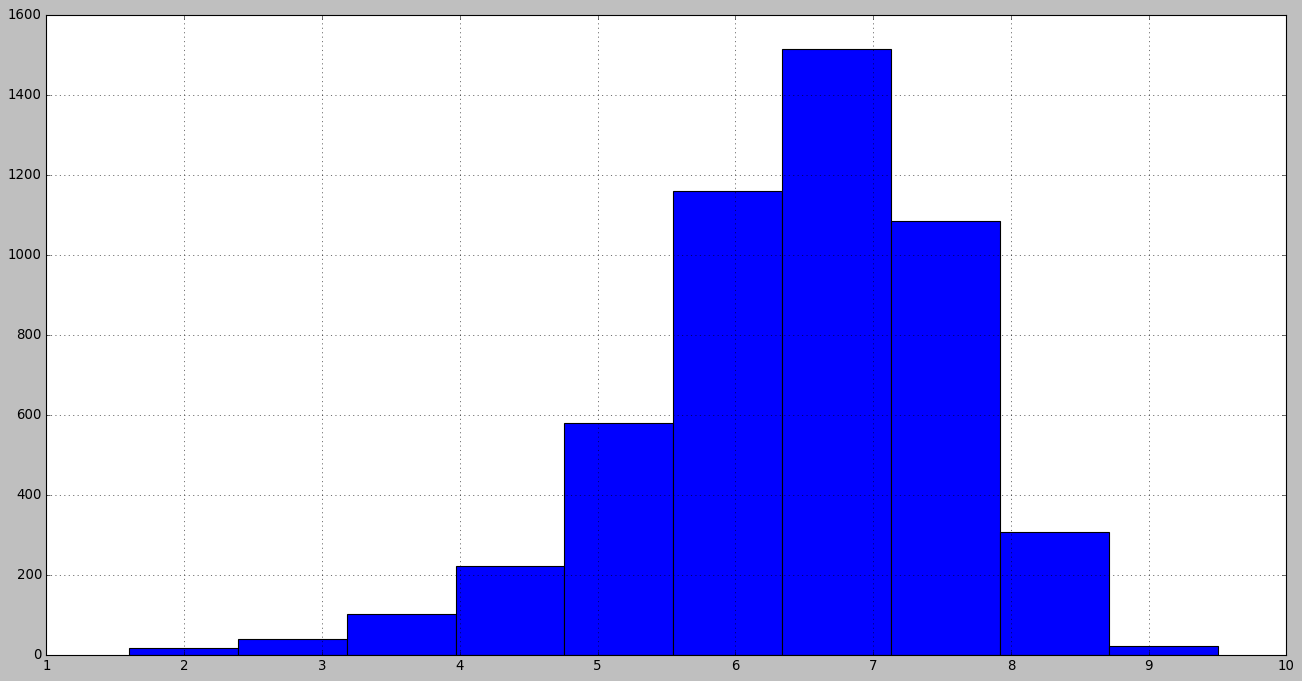

In [263]:
df1.imdb_score.hist()

In [264]:
df1.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [265]:
def standarise(column,pct,pct_lower):
    sc = StandardScaler() 
    y = df1[column][df1[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    sc.fit(yy)
    y_std =sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [266]:
def fit_distribution(column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted sistrinution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [267]:
fit_distribution('num_critic_for_reviews',0.99,0.01)

(1.158010642191692, -1.2163261960545206, 1.2776352127738277)

(-9.29193606224896e-17, 1.0)

(0.663713903844277, 3.7168387128883102, 1.248083980053512)



C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(0.8936708431444322, 4.371191566850696, -1.2144312859786344, 7.264983035107284)

(0.5315496930647619, -1.5383822679539065, 2.894134827727602)

(-1.2144312859786341, 4.931269998866943)

(1.2148416880340882, -1.2171526987992132, 1.001884181628526)

(-1.2144312859786341, 1.2144312859786341)

(0.7183154366223365, -1.4600100290244789, 1.1490492184962156)

(1.814569004763781, -2.8476618041686e-17, 1.1043041872738693)

(0.0050395171734554595, -1.2303529678102323, 4.951486598251737)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
0   weibull_min        24.0
6         gamma        46.0
9      pearson3        46.0
3          beta       100.0
4      invgauss       129.0
8       lognorm       145.0
7         expon       235.0
10       triang      1374.0
1          norm      2659.0
5       uniform      6644.0
2   weibull_max     18131.0


In [268]:
df1.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [310]:
df1.drop_duplicates(inplace=True)
df1.shape

(4998, 28)

In [311]:
color_mode = df1['color'].mode().iloc[0]
df1.color.fillna(color_mode, inplace = True)
df1.color.isnull().sum()

0

In [312]:
df1 = df1.dropna(axis = 0, subset = ['director_name'] )

In [272]:
df1.num_critic_for_reviews.min(), df1.num_critic_for_reviews.max(), df1.num_critic_for_reviews.median(),df1.num_critic_for_reviews.mean()

(1.0, 813.0, 112.0, 142.2358276643991)

In [313]:
num_critic_for_reviews_median = df1['num_critic_for_reviews'].median()
df1.num_critic_for_reviews.fillna(num_critic_for_reviews_median, inplace = True)
df1.num_critic_for_reviews.isnull().sum()

0

In [274]:
df1.duration.min(), df1.duration.max(), df1.duration.median(),df1.duration.mean()

(7.0, 330.0, 104.0, 108.14829987709955)

In [314]:
duration_median=df1['duration'].median()
df1.duration.fillna(duration_median,inplace=True)

In [316]:
df1.duration.isnull().sum()

0

In [315]:
df1 = df1.dropna(axis = 0, subset = ['gross'])
df1.gross.isnull().sum()

0

In [317]:
df1.shape
df1.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes        13
actor_2_name                   6
actor_1_facebook_likes         4
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       264
title_year                     0
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

In [318]:
actor_3_facebook_likes_median = df1['actor_3_facebook_likes'].median()
df1.actor_3_facebook_likes.fillna(actor_3_facebook_likes_median, inplace = True)
df1.actor_3_facebook_likes.isnull().sum()

0

In [319]:
actor_1_facebook_likes_median = df1['actor_1_facebook_likes'].median()
df1.actor_1_facebook_likes.fillna(actor_1_facebook_likes_median, inplace = True)
df1.actor_1_facebook_likes.isnull().sum()

0

In [281]:
df1.shape

(4121, 28)

In [282]:
df1.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   6
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   4
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  13
facenumber_in_poster           7
plot_keywords                 40
movie_imdb_link                0
num_user_for_reviews           1
language                       3
country                        0
content_rating                64
budget                       264
title_year                     0
actor_2_facebook_likes         6
imdb_score                     0
aspect_ratio                 104
movie_facebook_likes           0
dtype: int64

In [320]:
df1 = df1.dropna(axis = 0, subset = ['actor_2_name'])
df1.gross.isnull().sum()
df1 = df1.dropna(axis = 0, subset = ['actor_1_name'])
df1.gross.isnull().sum()
df1 = df1.dropna(axis = 0, subset = ['actor_3_name'])
df1.gross.isnull().sum()

facenumber_in_poster_median = df1['facenumber_in_poster'].median()

In [321]:
df1['facenumber_in_poster'].median()

1.0

In [322]:
df1.facenumber_in_poster.fillna(facenumber_in_poster_median, inplace = True)
df1.facenumber_in_poster.isnull().sum()

0

In [286]:
df1.language.unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Hindi', 'Maya', 'Kazakh', 'Telugu', 'Cantonese',
       'Japanese', 'Aramaic', 'Italian', 'Dutch', 'Dari', 'German',
       'Hebrew', 'Mongolian', 'Russian', 'Thai', 'Bosnian', 'Korean',
       'Hungarian', 'Portuguese', nan, 'Icelandic', 'Danish', 'Chinese',
       'Norwegian', 'Czech', 'Swedish', 'None', 'Zulu', 'Polish',
       'Dzongkha', 'Arabic', 'Vietnamese', 'Indonesian', 'Romanian',
       'Persian', 'Greek'], dtype=object)

In [287]:
df1.language.mode().iloc[0]

'English'

In [323]:
df1.language.fillna('English', inplace = True)

In [289]:
df1.language.isnull().sum()

0

In [290]:
df1.language.unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Hindi', 'Maya', 'Kazakh', 'Telugu', 'Cantonese',
       'Japanese', 'Aramaic', 'Italian', 'Dutch', 'Dari', 'German',
       'Hebrew', 'Mongolian', 'Russian', 'Thai', 'Bosnian', 'Korean',
       'Hungarian', 'Portuguese', 'Icelandic', 'Danish', 'Chinese',
       'Norwegian', 'Czech', 'Swedish', 'None', 'Zulu', 'Polish',
       'Dzongkha', 'Arabic', 'Vietnamese', 'Indonesian', 'Romanian',
       'Persian', 'Greek'], dtype=object)

In [324]:
df1.aspect_ratio.mode().iloc[0]

2.35

In [325]:
df1.aspect_ratio.fillna('2.35', inplace = True)

In [293]:
df1.aspect_ratio.unique()


array([1.78, 2.35, 1.85, 2.0, 2.2, 2.39, 2.24, 1.66, 1.5, 1.77, 2.4, 1.37,
       '2.35', 2.76, 1.33, 1.18, 1.44, 2.55, 1.75, 16.0], dtype=object)

In [326]:
df1.isnull().sum()

color                          0
director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster           0
plot_keywords                 38
movie_imdb_link                0
num_user_for_reviews           1
language                       0
country                        0
content_rating                59
budget                       261
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [327]:
df1.content_rating.fillna('Not Rated', inplace = True)
df1 = df1.dropna(axis = 0, subset = ['plot_keywords'])
df1 = df1.dropna(axis = 0, subset = ['budget'])
df1 = df1.dropna(axis = 0, subset = ['num_user_for_reviews'])

In [328]:
df1.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [297]:
df1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413


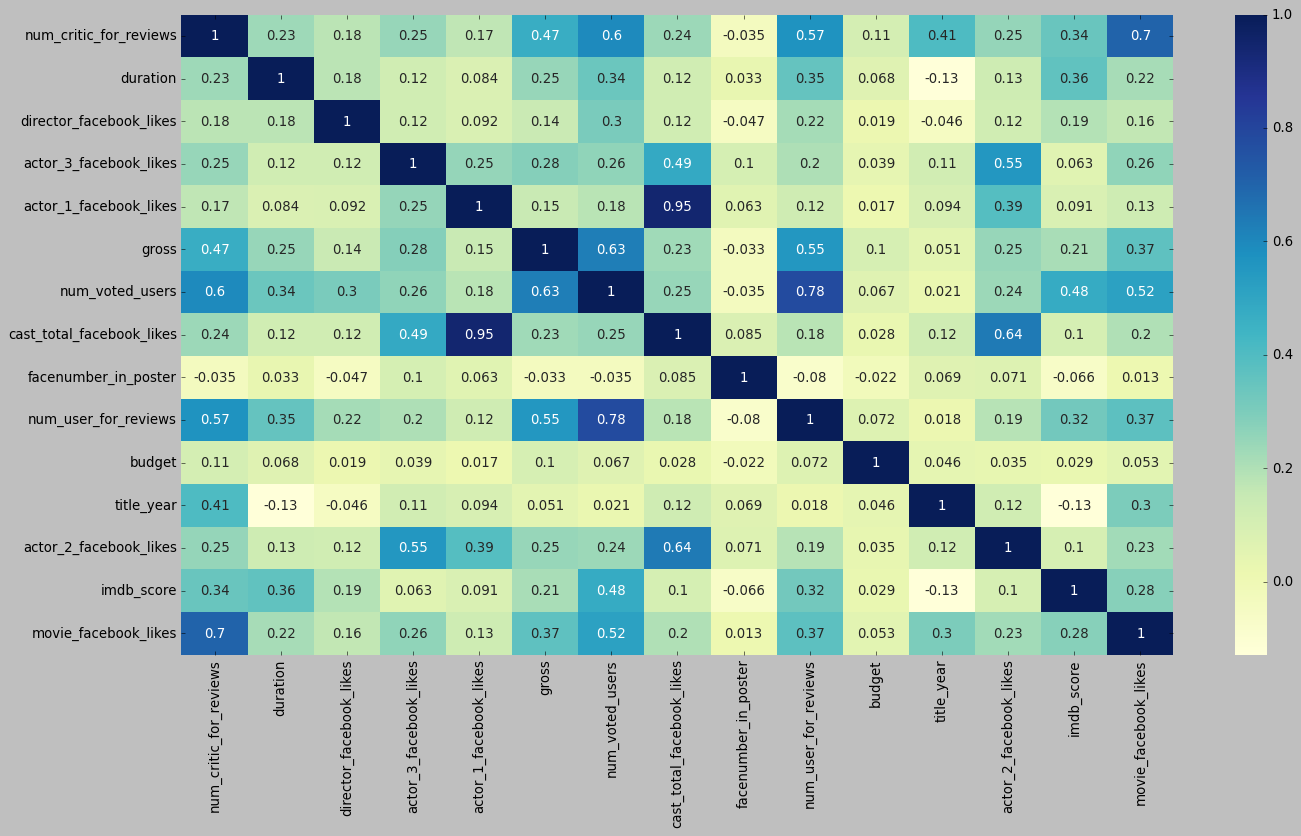

In [298]:
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

In [299]:
dataset = df1.drop(['color','director_name','actor_2_name','genres','language','country','actor_1_name','movie_title','actor_3_name','plot_keywords','movie_imdb_link','content_rating','aspect_ratio'], axis = 1)

In [300]:
dataset
df1

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
5034,Color,Neill Dela Llana,35.0,80.0,0.0,0.0,Edgar Tancangco,0.0,70071.0,Thriller,...,35.0,English,Philippines,Not Rated,7000.0,2005.0,0.0,6.3,2.35,74
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,2.35,413


In [301]:
dataset

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,143.0,77.0,291.0,8.0,291.0,424760.0,72639,368,0.0,371.0,7000.0,2004.0,45.0,7.0,19000
5034,35.0,80.0,0.0,0.0,0.0,70071.0,589,0,0.0,35.0,7000.0,2005.0,0.0,6.3,74
5035,56.0,81.0,0.0,6.0,121.0,2040920.0,52055,147,0.0,130.0,7000.0,1992.0,20.0,6.9,0
5037,14.0,95.0,0.0,133.0,296.0,4584.0,1338,690,1.0,14.0,9000.0,2011.0,205.0,6.4,413


In [302]:
datacorrelation = df1.corr()['imdb_score'][:1]
datacorrelation

num_critic_for_reviews    0.34429
Name: imdb_score, dtype: float64

In [303]:
df1['genres_first'] = df1.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)

In [304]:
df1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genres_first
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,Action
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,Action
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,Action
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,Action


In [305]:
data = pd.get_dummies(dataset)

# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[['imdb_score']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['imdb_score']] = pd.DataFrame(x_scaled)

In [306]:
data.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,0.818182,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,0.714286,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,0.675325,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,0.896104,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,0.597403,24000


C:\Users\djeth\AppData\Local\Temp\ipykernel_10120\1984736628.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  axis = df1.groupby('imdb_score')[[c]].mean().plot(figsize=(10,5),marker='o',color='g')


TypeError: no numeric data to plot

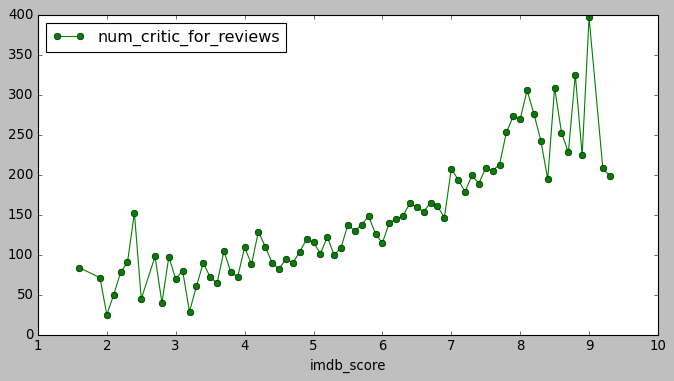

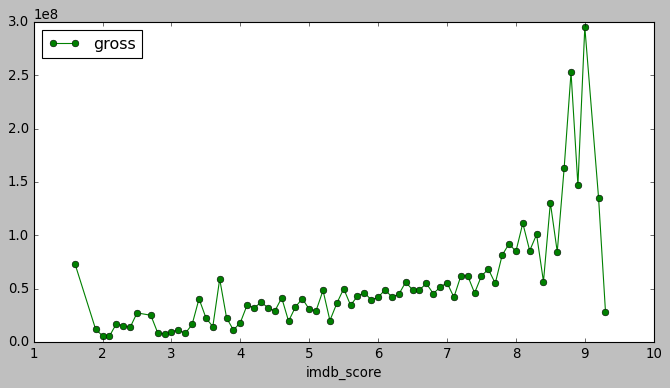

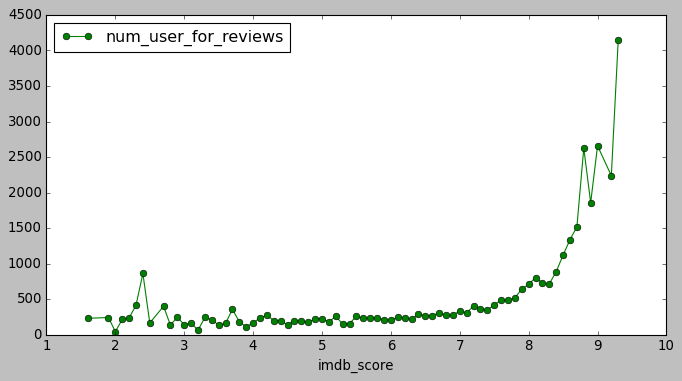

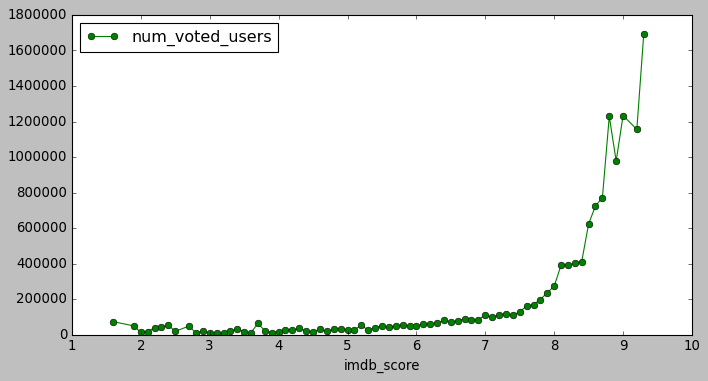

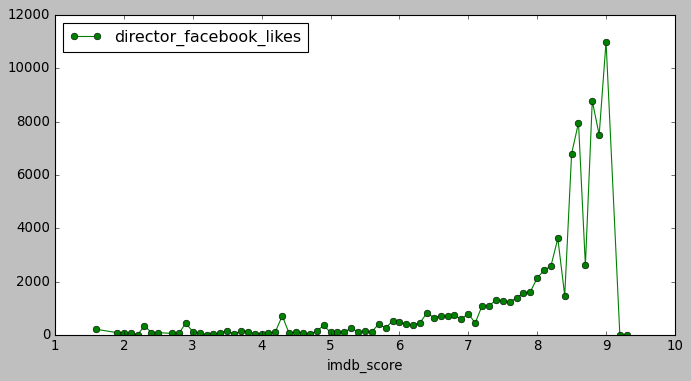

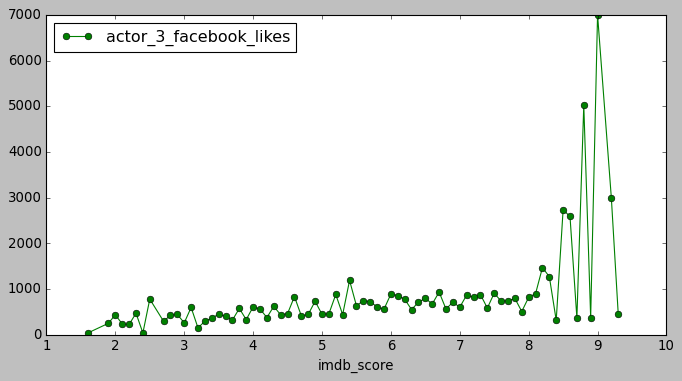

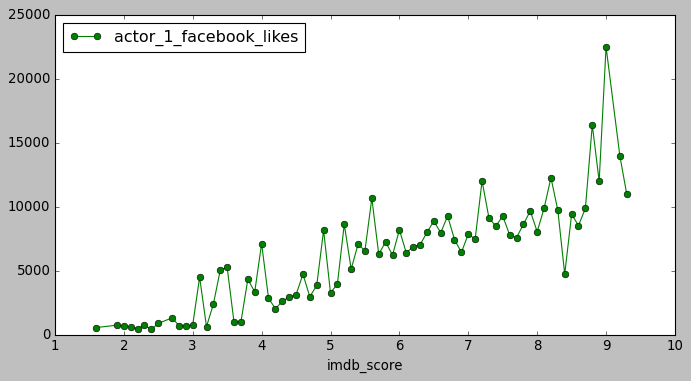

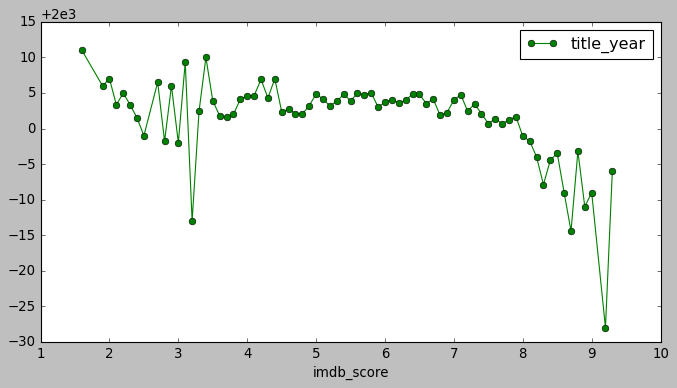

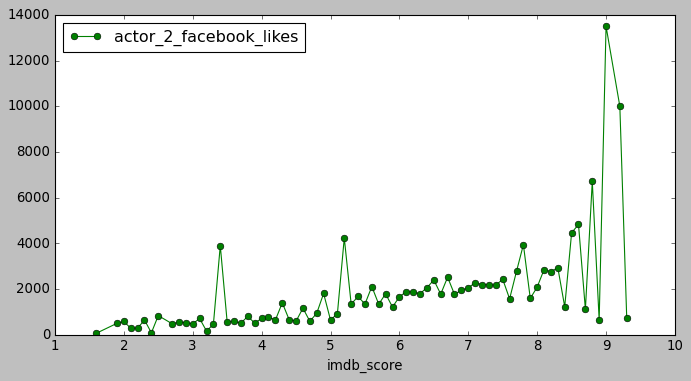

In [307]:

##Now there is no data missing from any of the columns. 


## Checking distribution of independent variables

data=df1[['num_critic_for_reviews', 'gross', 'num_user_for_reviews', 'num_voted_users', 'director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','title_year','actor_2_facebook_likes','aspect_ratio','cast_total_facebook_likes','facenumber_in_poster','duration','budget','movie_facebook_likes']]
for c in data.columns[:]:
    
    axis = df1.groupby('imdb_score')[[c]].mean().plot(figsize=(10,5),marker='o',color='g')


In [ ]:


IMDB = df1


In [ ]:
IMDB.head()

IMDB.drop('color',axis=1,inplace=True)

In [ ]:
IMDB.head()

In [ ]:
##Adding a new column and replacing existing column for genre as it will help in sorting the movies based on one genre.

IMDB['genres_first'] = df1.genres.apply(lambda x: x.split('|')[0] if '|' in x else x)

In [ ]:
IMDB.head()

In [365]:
movie_ML=df1




In [366]:
movie_ML.drop('actor_1_name',axis=1,inplace=True)
movie_ML.drop('actor_2_name',axis=1,inplace=True)
movie_ML.drop('actor_3_name',axis=1,inplace=True)
movie_ML.drop('movie_title',axis=1,inplace=True)
movie_ML.drop('plot_keywords',axis=1,inplace=True)
movie_ML.drop('director_name',axis=1,inplace=True)


KeyError: "['actor_1_name'] not found in axis"

In [367]:
#Adding the facebook likes of actor 2 and actor 3 together 
movie_ML['Other_actor_facebbok_likes']=movie_ML["actor_2_facebook_likes"] + movie_ML['actor_3_facebook_likes']

KeyError: 'actor_2_facebook_likes'

In [368]:
movie_ML.drop('actor_3_facebook_likes',axis=1,inplace=True)
movie_ML.drop('actor_2_facebook_likes',axis=1,inplace=True)

KeyError: "['actor_3_facebook_likes'] not found in axis"

In [369]:
movie_ML.drop('cast_total_facebook_likes',axis=1,inplace=True)



KeyError: "['cast_total_facebook_likes'] not found in axis"

In [370]:
movie_ML.drop('num_voted_users',axis=1,inplace=True)

KeyError: "['num_voted_users'] not found in axis"

In [371]:
movie_ML.drop('genres',axis=1,inplace=True)


KeyError: "['genres'] not found in axis"

In [343]:
movie_ML.drop('movie_imdb_link',axis=1,inplace=True)


KeyError: "['movie_imdb_link'] not found in axis"

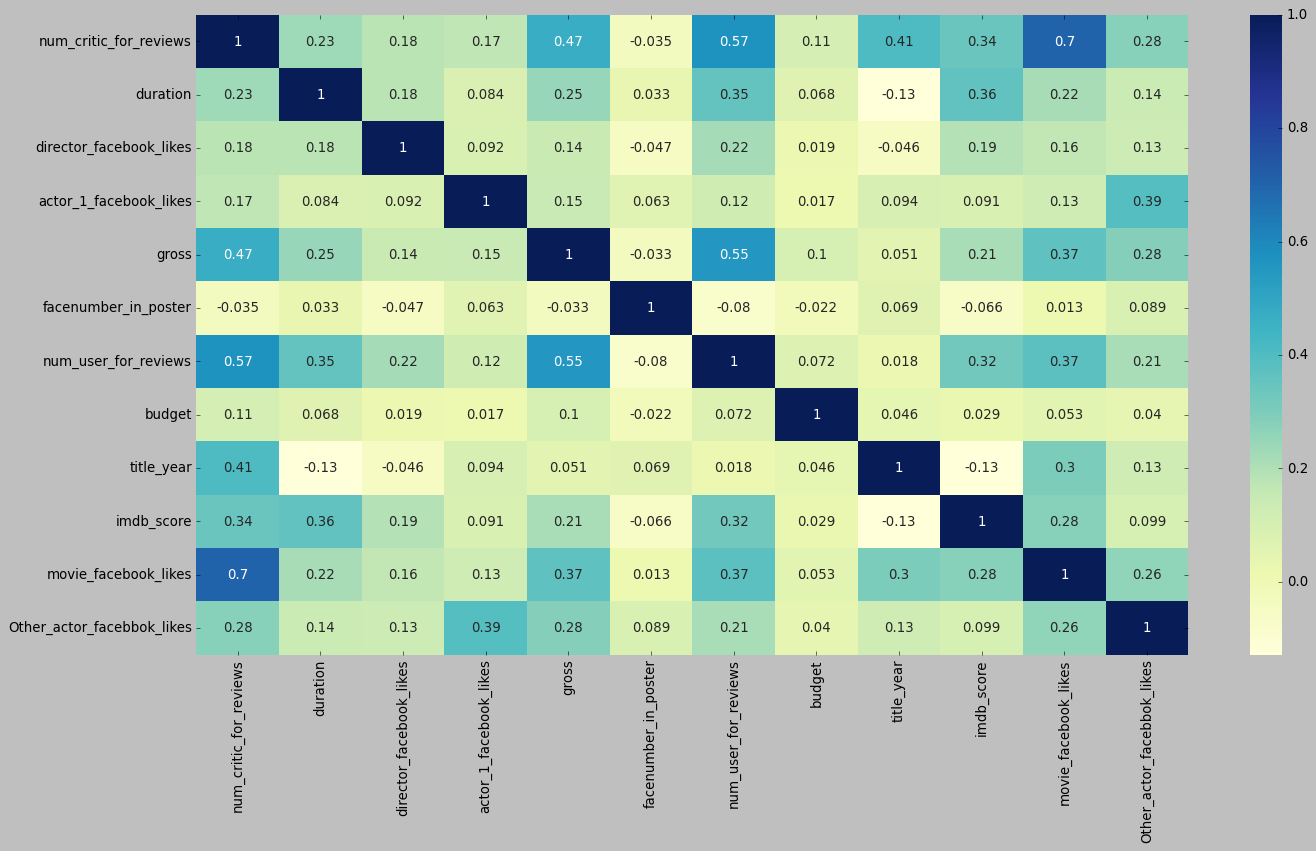

In [341]:

sns.heatmap(movie_ML.corr(), annot=True, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = (20, 15)
plt.show()

In [372]:
movie_ML.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,country,content_rating,budget,title_year,imdb_score,aspect_ratio,movie_facebook_likes,Other_actor_facebbok_likes
0,723.0,178.0,0.0,1000.0,760505847.0,0.0,3054.0,USA,PG-13,237000000.0,2009.0,7.9,1.78,33000,1791.0
1,302.0,169.0,563.0,40000.0,309404152.0,0.0,1238.0,USA,PG-13,300000000.0,2007.0,7.1,2.35,0,6000.0
2,602.0,148.0,0.0,11000.0,200074175.0,1.0,994.0,UK,PG-13,245000000.0,2015.0,6.8,2.35,85000,554.0
3,813.0,164.0,22000.0,27000.0,448130642.0,0.0,2701.0,USA,PG-13,250000000.0,2012.0,8.5,2.35,164000,46000.0
5,462.0,132.0,475.0,640.0,73058679.0,1.0,738.0,USA,PG-13,263700000.0,2012.0,6.6,2.35,24000,1162.0


In [547]:
movie_ML.isnull().sum()

num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_1_facebook_likes        0
gross                         0
facenumber_in_poster          0
num_user_for_reviews          0
title_year                    0
movie_facebook_likes          0
Other_actor_facebbok_likes    0
country_USA                   0
country_other                 0
content_rating_G              0
content_rating_GP             0
content_rating_M              0
content_rating_NC-17          0
content_rating_Not Rated      0
content_rating_PG             0
content_rating_PG-13          0
content_rating_Passed         0
content_rating_R              0
content_rating_Unrated        0
content_rating_X              0
imdb_divided_score            0
dtype: int64

In [475]:
movie_ML.drop('language',axis=1,inplace=True)
movie_ML.drop('color',axis=1,inplace=True)


KeyError: "['language'] not found in axis"

In [478]:
movie_ML.drop('aspect_ratio',axis=1,inplace=True)

In [374]:
value_counts=movie_ML["country"].value_counts()
print(value_counts)

USA               3023
UK                 318
France             105
Germany             81
Canada              61
Australia           41
Spain               21
Japan               17
China               14
Hong Kong           13
India               12
New Zealand         11
Italy               11
Denmark              9
South Korea          8
Mexico               7
Ireland              7
Brazil               5
Norway               4
Iran                 4
Thailand             4
Argentina            3
Russia               3
Netherlands          3
Czech Republic       3
South Africa         3
Hungary              2
Romania              2
Israel               2
Iceland              2
Taiwan               2
Official site        1
New Line             1
Sweden               1
Afghanistan          1
Indonesia            1
Belgium              1
Poland               1
Colombia             1
Greece               1
Finland              1
Peru                 1
Chile                1
Aruba      

In [375]:
##get top 2 values of index
vals = value_counts[:2].index
print (vals)
movie_ML['country'] = movie_ML.country.where(movie_ML.country.isin(vals), 'other')
movie_ML["country"].value_counts()

Index(['USA', 'UK'], dtype='object')


USA      3023
other     476
UK        318
Name: country, dtype: int64

In [376]:
movie_ML = pd.get_dummies(data = movie_ML, columns = ['country'] , prefix = ['country'] , drop_first = True)
movie_ML = pd.get_dummies(data = movie_ML, columns = ['content_rating'] , prefix = ['content_rating'] , drop_first = True)



In [548]:
movie_ML.columns


Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_1_facebook_likes', 'gross', 'facenumber_in_poster',
       'num_user_for_reviews', 'title_year', 'movie_facebook_likes',
       'Other_actor_facebbok_likes', 'country_USA', 'country_other',
       'content_rating_G', 'content_rating_GP', 'content_rating_M',
       'content_rating_NC-17', 'content_rating_Not Rated', 'content_rating_PG',
       'content_rating_PG-13', 'content_rating_Passed', 'content_rating_R',
       'content_rating_Unrated', 'content_rating_X', 'imdb_divided_score'],
      dtype='object')

In [450]:
movie_ML.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,aspect_ratio,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,imdb_divided_score
0,723.0,178.0,0.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,1.78,...,0,0,0,0,1,0,0,0,0,3
1,302.0,169.0,563.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,2.35,...,0,0,0,0,1,0,0,0,0,3
2,602.0,148.0,0.0,11000.0,200074175.0,1.0,994.0,245000000.0,2015.0,2.35,...,0,0,0,0,1,0,0,0,0,3
3,813.0,164.0,22000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,2.35,...,0,0,0,0,1,0,0,0,0,4
5,462.0,132.0,475.0,640.0,73058679.0,1.0,738.0,263700000.0,2012.0,2.35,...,0,0,0,0,1,0,0,0,0,3


In [378]:
# We need to categorize the imdb values in the range of 0-4,4-6,6-8 and 8-10 to mark them as the bad,average,good and excellent movies respectively

movie_ML["imdb_divided_score"]=pd.cut(movie_ML['imdb_score'], bins=[0,4,6,8,10], right=True, labels=False)+1

In [386]:
movie_ML.drop('imdb_score',axis=1,inplace=True)

KeyError: "['imdb_score'] not found in axis"

In [555]:
movie_ML.drop('budget',axis=1,inplace=True)

KeyError: "['budget'] not found in axis"

In [560]:
X=pd.DataFrame(columns=['country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_Unrated','content_rating_X'],data=movie_ML)
y=pd.DataFrame(columns=['imdb_divided_score'],data=movie_ML)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [561]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [562]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[  0   0  32   0]
 [  0   0 319   1]
 [  0   0 744   0]
 [  0   0  50   0]]
Accuracy: 0.6492146596858639


In [563]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[  0   0  32   0]
 [  0   0 320   0]
 [  0   0 744   0]
 [  0   0  50   0]]
Accuracy: 0.6492146596858639


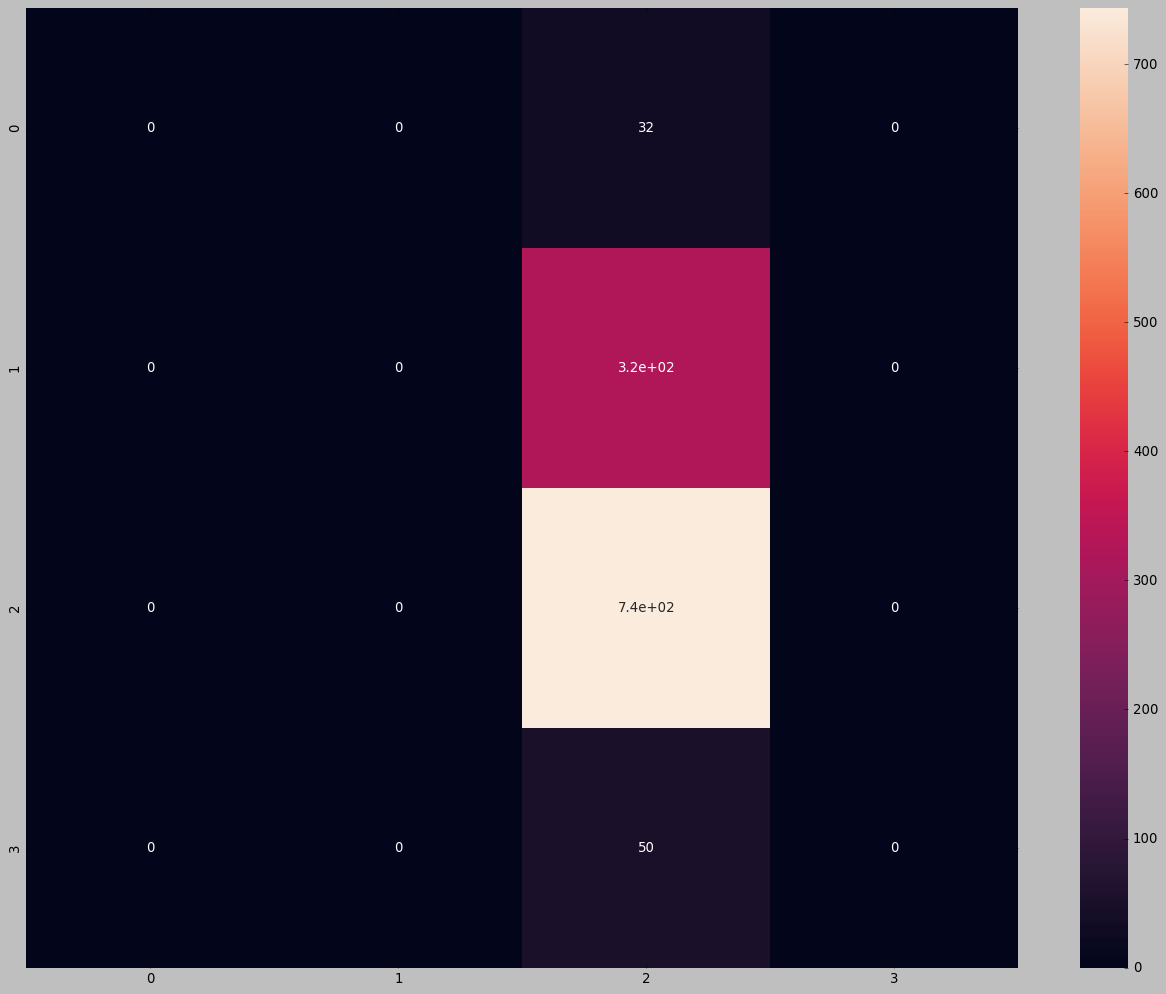

In [568]:
sns.heatmap(cnf_matrix, annot=True)
plt.show()

In [ ]:
movie_ML.dtypes


In [510]:
movie_ML.iloc[:] = movie_ML.iloc[:].astype(int)
movie_ML.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,movie_facebook_likes,...,content_rating_M,content_rating_NC-17,content_rating_Not Rated,content_rating_PG,content_rating_PG-13,content_rating_Passed,content_rating_R,content_rating_Unrated,content_rating_X,imdb_divided_score
0,723,178,0,1000,760505847,0,3054,237000000,2009,33000,...,0,0,0,0,1,0,0,0,0,3
1,302,169,563,40000,309404152,0,1238,300000000,2007,0,...,0,0,0,0,1,0,0,0,0,3
2,602,148,0,11000,200074175,1,994,245000000,2015,85000,...,0,0,0,0,1,0,0,0,0,3
3,813,164,22000,27000,448130642,0,2701,250000000,2012,164000,...,0,0,0,0,1,0,0,0,0,4
5,462,132,475,640,73058679,1,738,263700000,2012,24000,...,0,0,0,0,1,0,0,0,0,3


In [533]:
from sklearn.model_selection import  train_test_split

X = movie_ML[['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','Other_actor_facebbok_likes','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_Unrated','content_rating_X']]

y = movie_ML['imdb_divided_score']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

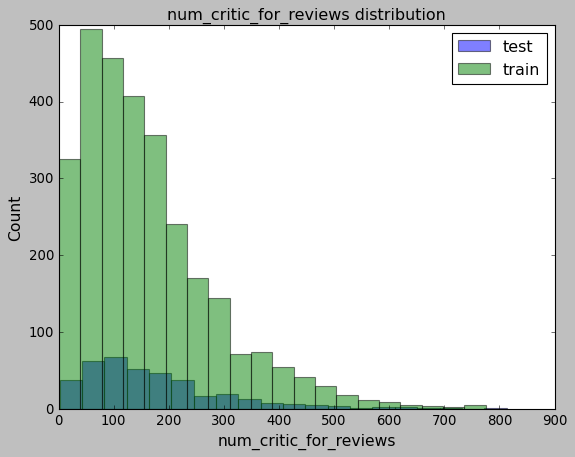

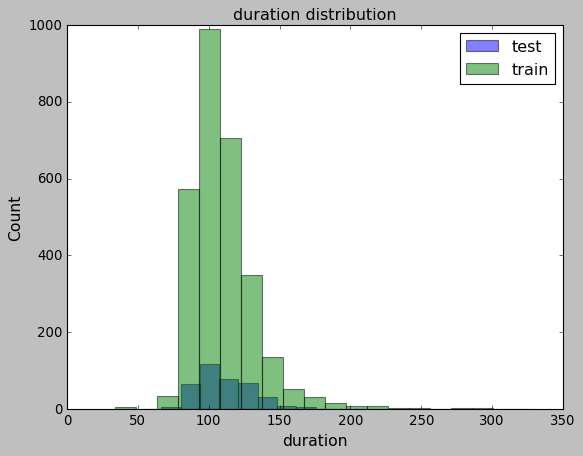

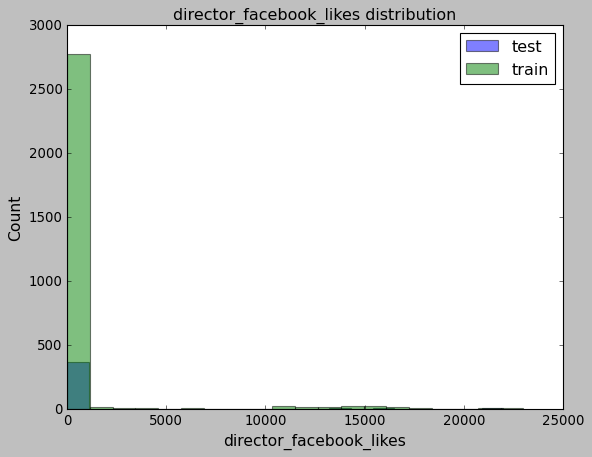

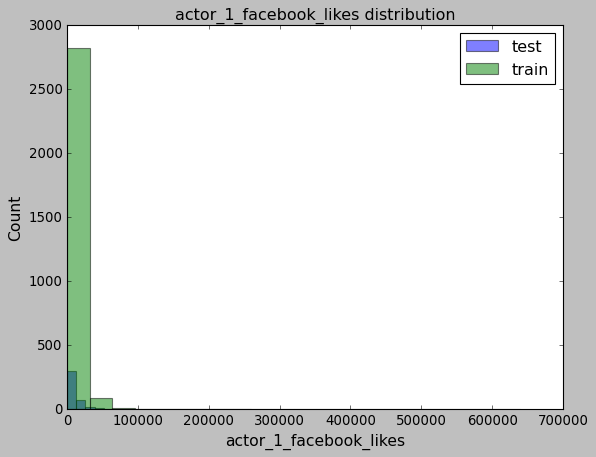

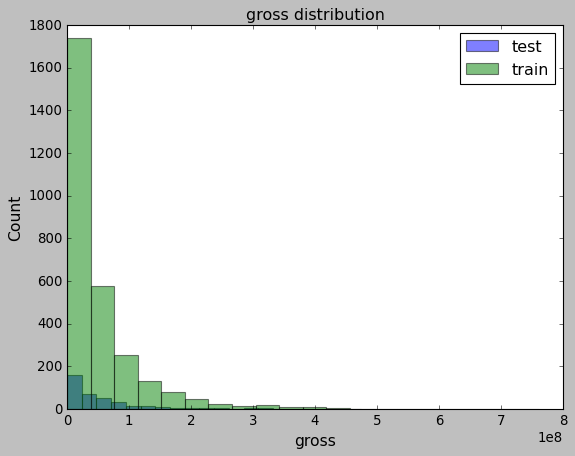

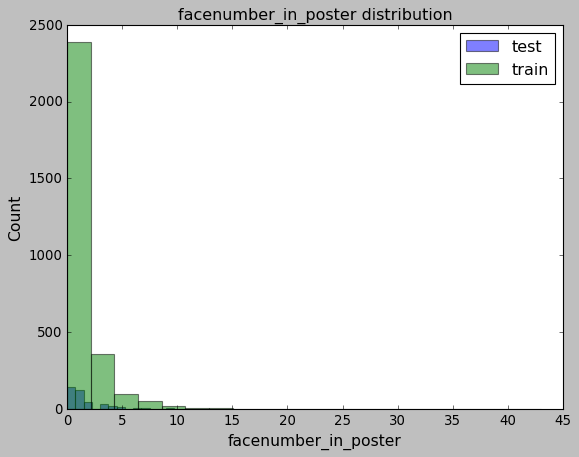

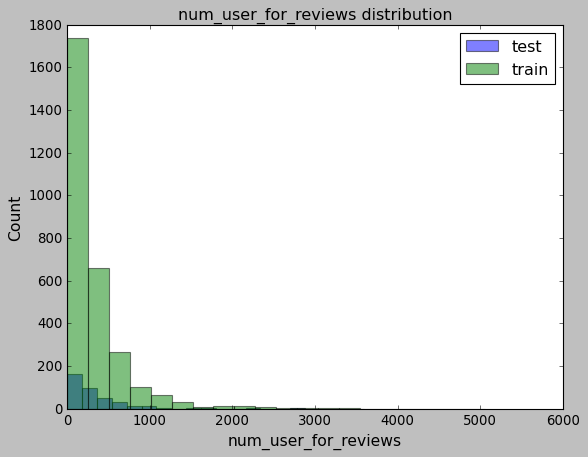

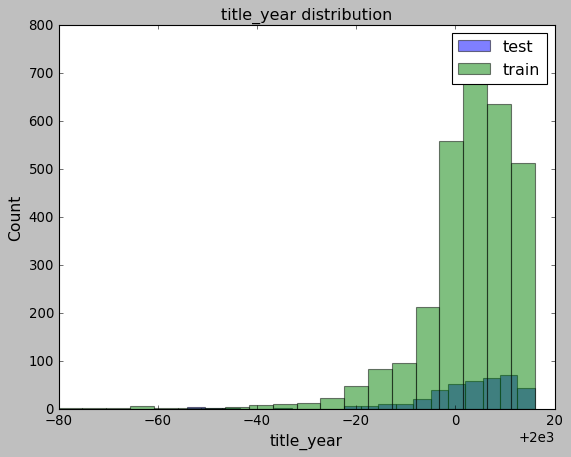

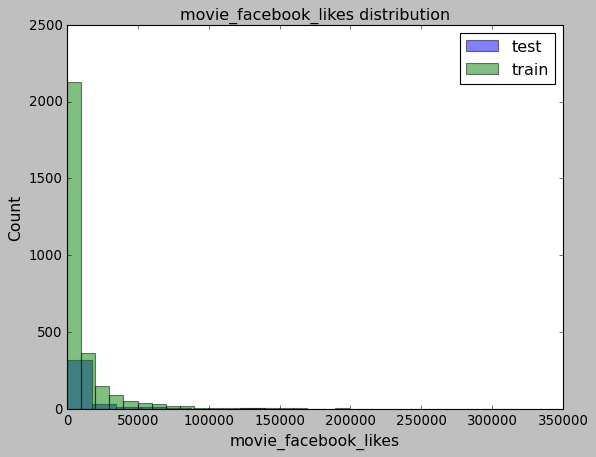

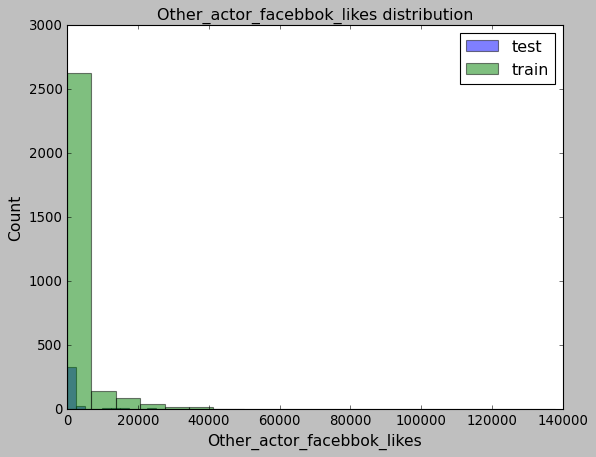

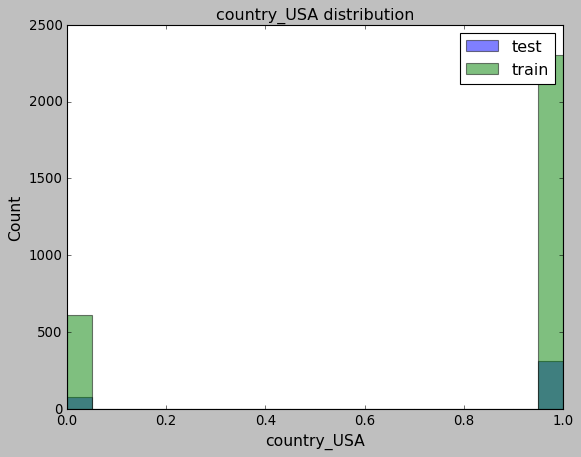

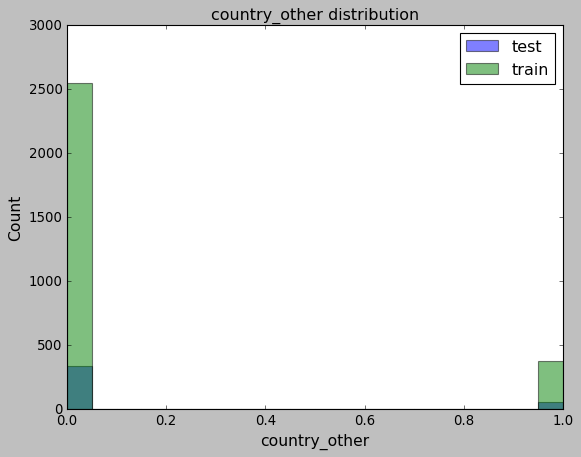

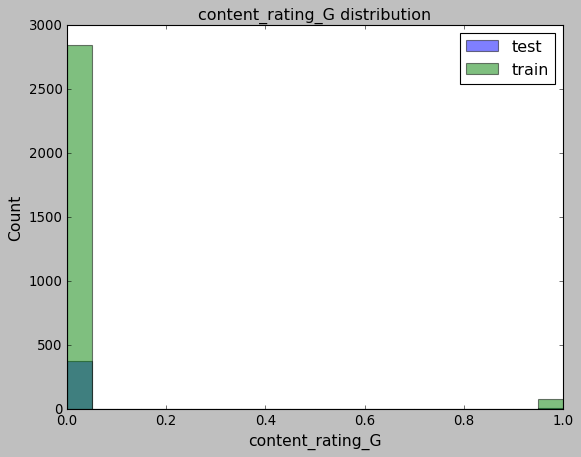

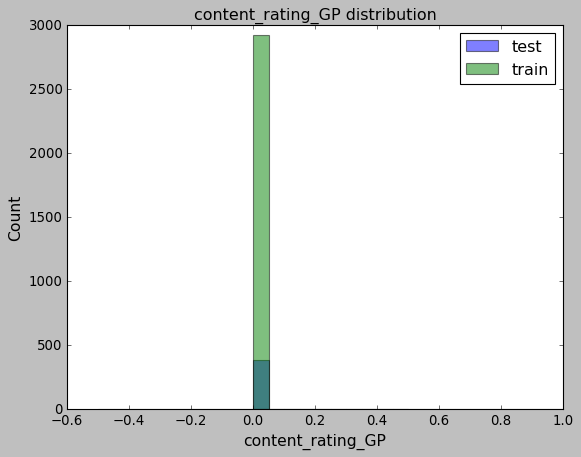

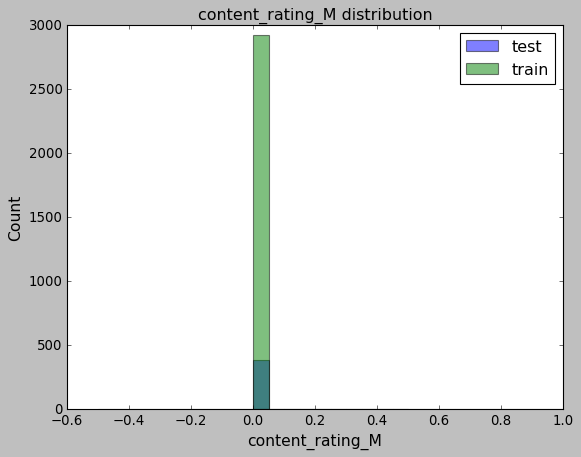

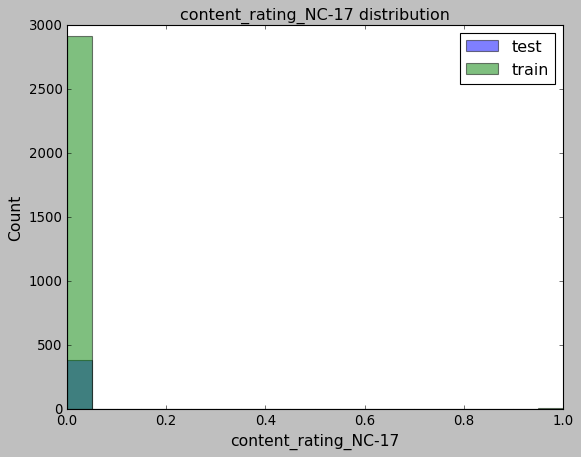

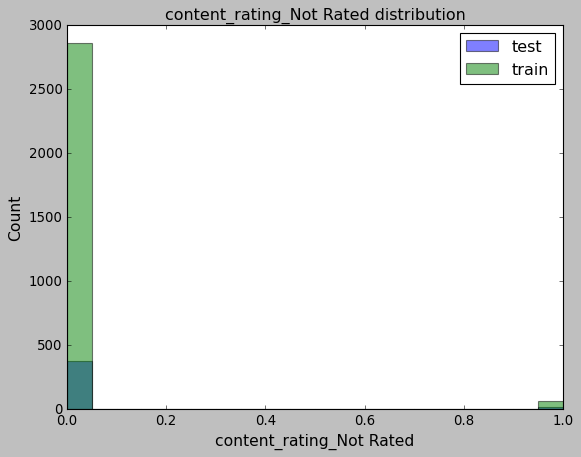

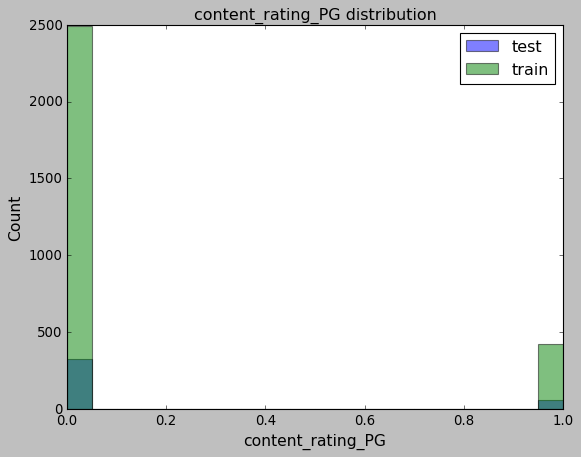

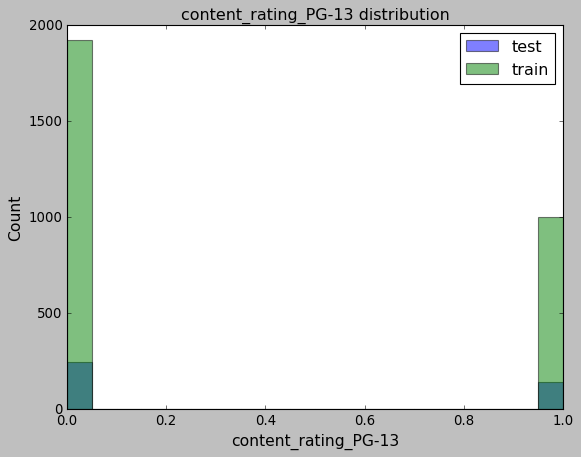

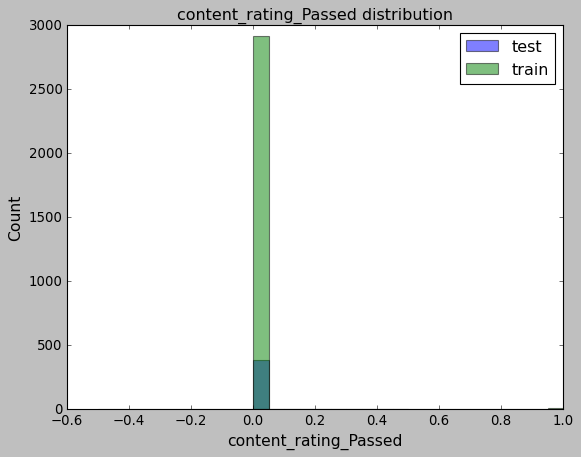

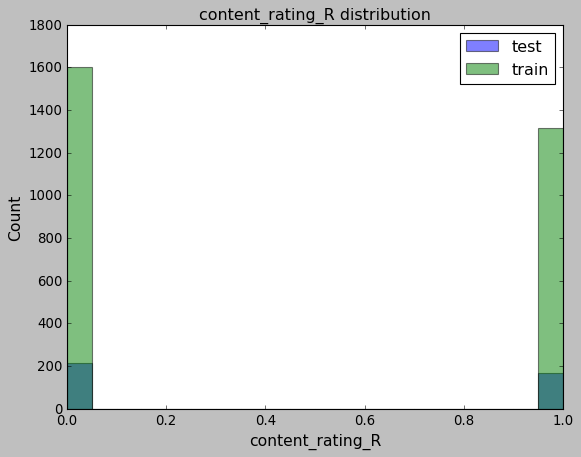

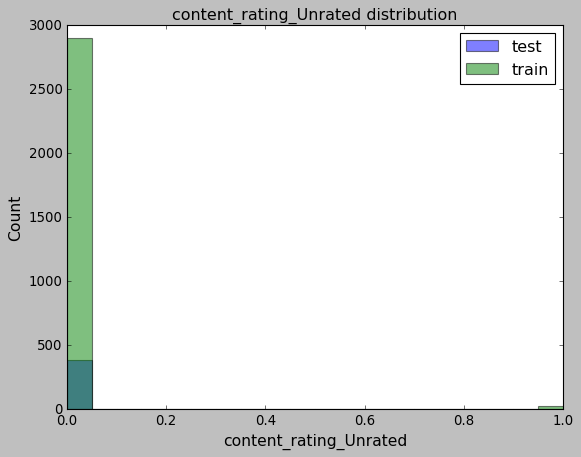

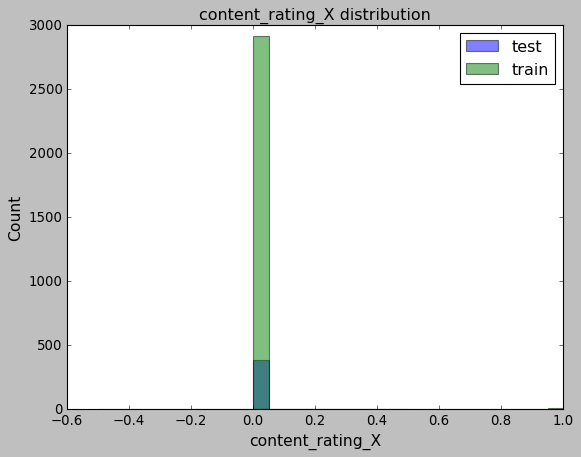

In [529]:
X_test_plot = X_test[['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','Other_actor_facebbok_likes','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_Unrated','content_rating_X']]

X_train_plot = X_train[['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','Other_actor_facebbok_likes','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_Unrated','content_rating_X']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [520]:
movie_ML.drop('budget',axis=1,inplace=True)

In [530]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

A=pd.DataFrame(columns=['num_critic_for_reviews','duration','director_facebook_likes','actor_1_facebook_likes','gross','facenumber_in_poster','num_user_for_reviews','title_year','movie_facebook_likes','Other_actor_facebbok_likes','country_USA','country_other','content_rating_G','content_rating_GP','content_rating_M','content_rating_NC-17','content_rating_Not Rated','content_rating_PG','content_rating_PG-13','content_rating_Passed','content_rating_R','content_rating_Unrated','content_rating_X'],data=movie_ML)
B=pd.DataFrame(columns=['imdb_divided_score'],data=movie_ML)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(A,B)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(A.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Specs         Score
8         movie_facebook_likes  1.906845e+07
2      director_facebook_likes  2.221056e+06
3       actor_1_facebook_likes  7.093518e+05
9   Other_actor_facebbok_likes  4.395395e+05
6         num_user_for_reviews  2.798905e+05
0       num_critic_for_reviews  3.230605e+04
1                     duration  1.948206e+03
5         facenumber_in_poster  3.665457e+01
18        content_rating_PG-13  3.542409e+01
20            content_rating_R  3.282262e+01


In [519]:
s = movie_ML.select_dtypes(np.number).lt(0).any()\
      .reindex(movie_ML.columns, fill_value=False)\
      .rename_axis("col").reset_index(name='isnegative')

s

,col,isnegative
0,num_critic_for_reviews,False
1,duration,False
2,director_facebook_likes,False
3,actor_1_facebook_likes,False
4,gross,False
5,facenumber_in_poster,False
6,num_user_for_reviews,False
7,budget,True
8,title_year,False
9,movie_facebook_likes,False


C:\Users\djeth\AppData\Local\Temp\ipykernel_10120\154237841.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(C,d)


[1.07955024e-01 1.09971227e-01 8.89852589e-02 8.53597089e-02
 1.01980820e-01 6.49020931e-02 1.06711651e-01 9.62605113e-02
 9.50448765e-02 8.54462757e-02 1.44808907e-02 6.50370894e-03
 3.72272142e-03 6.56964844e-06 5.43404630e-04 8.96653093e-04
 3.19697905e-03 7.60317120e-03 9.11517394e-03 3.45134017e-04
 8.54868200e-03 1.83344242e-03 5.86022952e-04]


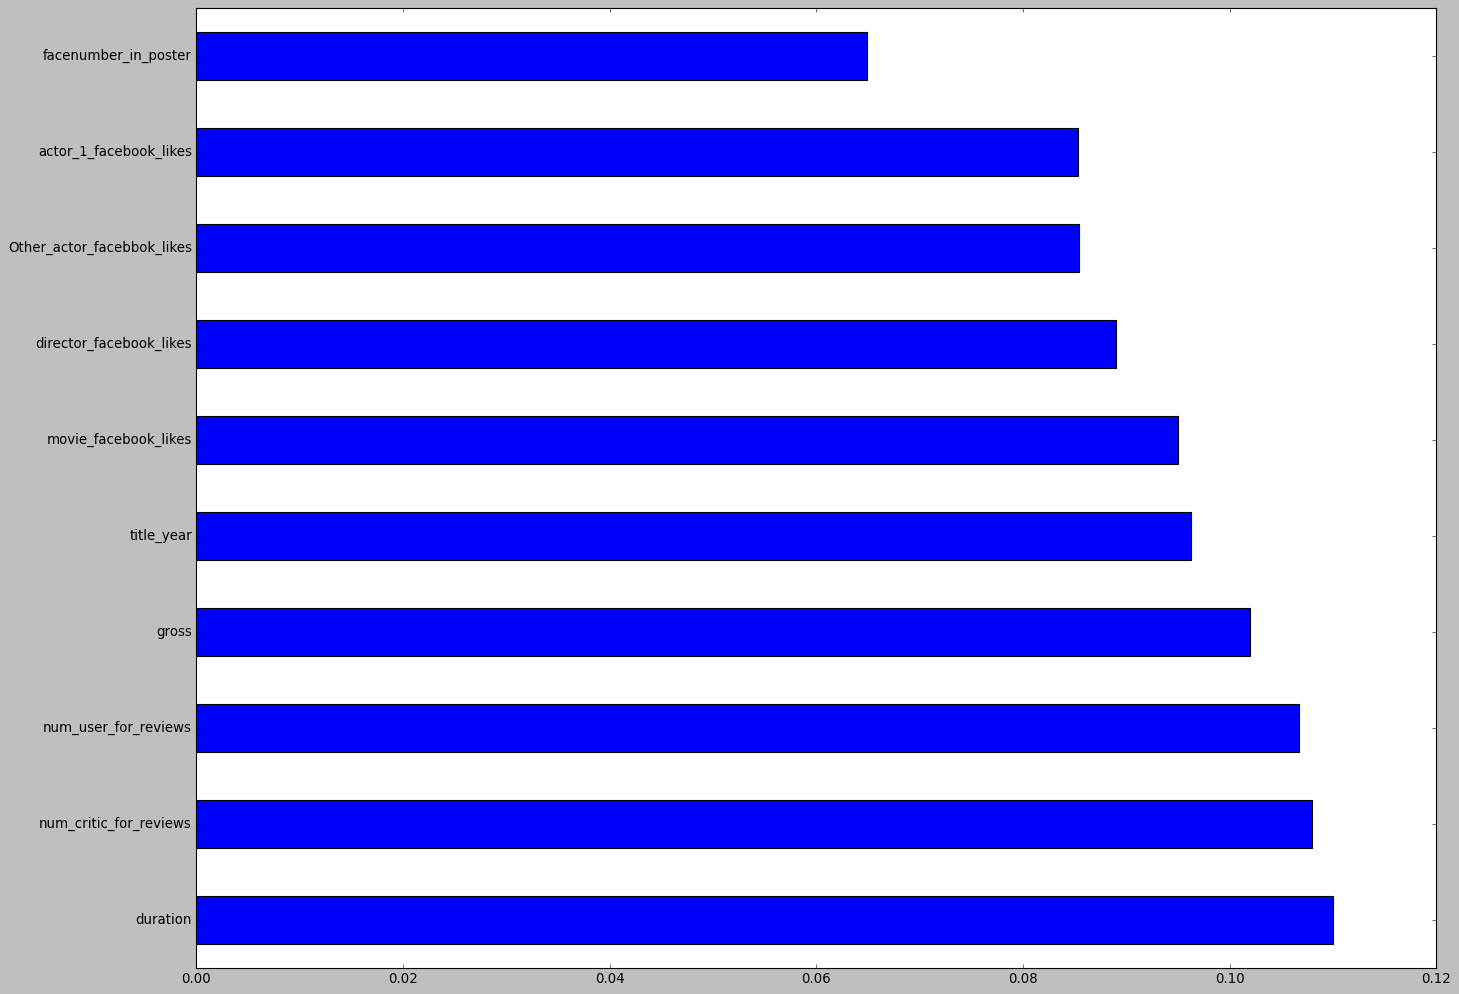

In [534]:
import pandas as pd
import numpy as np

C=movie_ML.loc[:,movie_ML.columns != "imdb_divided_score"]
d=pd.DataFrame(columns=['imdb_divided_score'],data=movie_ML)

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(C,d)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=C.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [535]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.26
Coefficient of determination: 0.24
R^2 score on tarining set = 0.24160461188919524


In [536]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.23
Coefficient of determination: 0.24
R^2 score on test set = 0.2404000715716723


In [537]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.1820 ± 0.0375,content_rating_R
0.1319 ± 0.0636,num_critic_for_reviews
0.0863 ± 0.0255,title_year
0.0639 ± 0.0426,duration
0.0631 ± 0.0312,content_rating_PG
0.0607 ± 0.0266,content_rating_Not Rated
0.0509 ± 0.0263,country_USA
0.0330 ± 0.0225,content_rating_PG-13
0.0227 ± 0.0137,movie_facebook_likes
0.0148 ± 0.0088,director_facebook_likes


In [496]:
!pip install eli5

  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=7713a07ed9c6a701afbb1d8eabc72045b6abd98eb3f33878c99d9e3e07944d06
  Stored in directory: c:\users\djeth\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [538]:
pred=model.predict(X_test)
variance=np.var(pred)
variance

0.3063581042186344

In [540]:
SSE=np.mean((np.mean(pred) - y) **2)
Bias = SSE - variance
Bias

0.03228678862600576

In [505]:
For more details, see [Section 1](#section_1).

SyntaxError: invalid syntax (913927147.py, line 1)